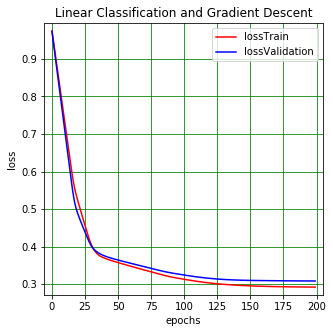

In [9]:

import os
os.chdir('D://dataset')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

# 加载数据中的特征和标签并进行预处理
X, y = load_svmlight_file('australian_scale.txt')
X = X.toarray()
X = np.c_[X,np.ones((X.shape[0], 1))]
y = y.reshape(y.shape[0], 1)

# 分割测试集，验证集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# 初始化参数
W = np.zeros((X.shape[1], 1))
learning_rate = 0.00006
epoch = 200
LAMBDA = 1 
c = 1

# 记录训练集的loss随迭代次数的值
lossTrain = []
lossTrainClassification = []
# 记录验证集的loss随迭代次数的值
lossValidation = []
lossValidationClassification = []

# 计算HingeLoss
def calHingeLoss(Yi, Xi, W):
    temp = Yi*np.dot(W.T, Xi.T)
    result = 1 - (Yi*np.dot(W.T, Xi.T))[0][0]
    if result > 0:
        hingeLoss = result
    else:
        hingeLoss = 0
    return hingeLoss
    
# 计算梯度
def calDirection(X_train, y_train,W):
    temp = np.zeros((X_train.shape[1], 1))
    for index in range(len(X_train)):
        Yi = y_train[index][0]
        Xi = X_train[index].reshape(1, X.shape[1])
        hingeLoss = calHingeLoss(Yi, Xi, W)
        if hingeLoss > 0:
            temp = temp + Yi * Xi.T
        else:
            temp = temp+np.zeros((X.shape[1], 1))
    direction = W - c * temp  
    return direction

# 计算loss
def calLoss(W, X_t, y_t):
    temp = 0
    for index in range(len(X_t)):
        Yi = y_t[index][0]
        Xi = X_t[index].reshape(1, X_t.shape[1])
        temp += calHingeLoss(Yi, Xi, W)
    temp = c * temp  
    Loss = 1/2 * np.dot(W.T, W) + temp
    return Loss/X_t.shape[0]
   
    
for i in range(epoch):
    #计算训练集的梯度
    direction = calDirection(X_train, y_train, W)
    # 更新参数
    W = W - learning_rate*direction
    
    # 计算训练集的loss
    Ltrain = calLoss(W, X_train, y_train)
    lossTrain.append(Ltrain[0][0]) # 将训练集的loss加入列表
    error = 0
    for index in range(len(X_train)):
        Ypredict = np.dot(X_train[index], W)
        if Ypredict > 0:
            Ypredict = 1
        else:
            Ypredict = -1
        if Ypredict != y_train[index][0]:
            error += 1    
        errorRate = error/float(len(X_train))
    lossTrainClassification.append(errorRate)
    
    # 计算测试集的loss
    Ltest = calLoss(W, X_test,y_test)
    lossValidation.append(Ltest[0][0])# 将测试集的loss加入列表
    error = 0
    for index in range(len(X_test)):
        Ypredict = np.dot(X_test[index], W)
        if Ypredict > 0:
            Ypredict = 1
        else:
            Ypredict = -1
        if Ypredict != y_test[index][0]:
            error += 1    
        errorRate = error/float(len(X_test))
    lossValidationClassification.append(errorRate)
    
#print(lossTrain)# 0.29229676314600489
#print(lossValidation)# 0.30852185898101969
    
# loss随迭代次数的变化图   
plt.figure(figsize = (5, 5))
plt.plot(range(epoch), lossTrain, label = "lossTrain", color = 'red')  
plt.plot(range(epoch), lossValidation, label = "lossValidation", color = 'blue')  
plt.xlabel("epochs")  
plt.ylabel('loss')  
plt.title("Linear Classification and Gradient Descent")
plt.grid(True, color = 'g')
plt.margins(0.03)
plt.legend()
plt.show()   